<a href="https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Proj2FinalReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Competition 2: Telemarketing**
---
# *By : Enadi Pasholli, Ryan Mulcahey, and Jonathan Luo*

# **Overview**
---
**Can we predict if a customer will open a new bank account from a telemarketing campaign?**

This project is designed to be able to predict wether or not a customer would or would not subscribe a new bank account from a telemarketing campaign. 

## Data Summary

To create our model we used a dataset from a portoguse bank spanning from 2008 to 2013. The dataset has 27 columns and 45,307 rows, or customers. Listed below in the data dictionary are all the features and descriptions for each variable in the dataset.

[The original dataset can be found here](https://raw.githubusercontent.com/mulcahrj/DATA6545_Final/main/comp2_data.csv)



| Field Name  |  Description | Type of Data | Example Values | 
|----------|-------------|------------|------------|
|**Bank Client Data**|
| Age | Person Age | Continuous | 17 - 98| 
| Job |  Type of Job | Catergorical |services,admin, etc| 
| Martial | Marital Status | Categorical|married, single, etc| 
| Education | Education Status | Categorical (Ordinal?) |basic.4y, high.school,university.degree, etc.| 
|Default| Has Credit in Default? |Categorical |yes,no,unknown,Nan | 
|Housing | Has Housing Loan? |Categorical |yes,no,unknown,Nan | 
|Loan|  Has Personal Loan? |Categorical |yes,no,unknown,Nan| 
|**Related with the Last Contact of the Current Campaign**|| 
|Contact|  Contact Communication Type |Categorical |telephone,nan,cellular| 
|Month| Last Contact Month of Year |Categorical|Jan - Dec| 
|day_of_week| Last Contact Day of the Week |Categorical|mon-fri,Nan| 
|Duration |  Last Contact Duration, in Seconds - **Data Dropped** |Continuous|0-4918| 
|Campaign| Number of Contacts Performed During this Campaign and for this Client |(Continuous?, includes last contact)|1-56| 
|pdays| Number of Days that Passed by After the Client was Last Contacted from a Previous Campaign; (999 means client was not previously contacted) |Continuous|0,1,2-999| 
|Previous| number of contacts performed before this campaign and for this client | Continuous|0-7| 
|Poutcome| Outcome of the Previous Marketing Campaign | Categorical |nonexistent nan failure success|
|**Socioeconomical Features (Portugal/Europe)**|
|emp.var.rate| Employment Variation Rate - Quarterly Indicator|Continuous|-3.4 - 1.4| 
|cons.price.idx| Consumer Price Index - Monthly Indicator | Continuous|92.2-94.77| 
|cons.conf.idx | Consumer Confidence Index - Monthly Indicator|Continuous|-50.8 - -26.9| 
|euribor3m| Euribor 3 Month Rolling Average - Daily Indicator |Continuous|0.63 - 5.04| 
|nr.employed|Number of Employees - Quarterly Indicator |Continuous|4963.6 - 5228.1| 
|**Additional Features**|
|total_assets|Total Assets Self Reported by the Customer in 1,000 Euros|Continuous| 10.85 - 360.4| 
|customer_ratings|Customer Rating of the Current Campaign |Categorical|1 - 5, Nan| 
|customer_language| Language Used by the Customer in the Current Campaign |Categorical|Portuguese, English, Spanish, Other, Nan| 
|rep_avg_rating| average rating of the representative prior to the current campaign |Continuous|2 - 5| 
|customer_length| Number of Months Customer Doing Business ith the Bank - Internal Records |Continuous|0 - 72| 
|other_banks| If the Customer is Doing Business with Other Banks - self-reported |Categorical|yes, no, unknown, Nan| 
|**Target**|
|y| Has the Client Subscribed a Term Deposit? |Binary|1,0| 

## Process

To create this model there are various chapters to the project. The first major component of the project is to do a data audit where we inspect and clean the dataset to make it useful. Once the data is in a useful state, we will choose which features produce the best model performance. After the features are selected then we will apply those features to the 6 models we have chosen to use, which are XGBoost, Random Forest, SVM, Logical Regression, Decision Tree, and Niave Bayes. Once we have our base results we will do some hypertuning to produce the best reults possible and then benchmark those results against the Niave Bayes model. 

Once we processed the dataset using the models above, we landed on Random Forest as the strongest model for predicting if a bank customer would ultimately open a term deposit account after targeting with the campaign. While Random Forest exhibited the highest bias (1-F1 Bias: 0.929, 1-AUC-ROC Bias: 0.976), it also proved the lowest cumulative variance, specifically for AUC-ROC variance of 0.0016, coming in at half the next lowest model, Decision Tree, with 0.0032. 1-F1 Variance of 0.0036 was similar to Decision Tree of 0.0035. 

When looking at the important features considered with Random Forest, we found that the primary drivers were customer total assets, how long the customer had been with the bank, Euribor 3-month rolling average, and average rating of the representative prior to current marketing campaign.

These results will help the bank more effectively design a marketing campaign for term deposit accounts to ensure the most efficient use of resources, and potentially convert those in the target profile to a higher degree.

# **Data Audit**
---

The first thing that we did to understand our data is data quality checks followed by EDA. Next we split our data into catagorical and continous datasets and further split those data sets into training and testing datasets. Once those datasets were created, we imputed the categorical dataframes by mode and the continous dataframes by median. After the imputation we engineered a few new features, binned categorical columns to a cap of 5 options per bin, and One-Hot-Encoded thhe categorical dataframes so that each option has its own column indicated by 1 and 0. For the continous dataframes, we dealt with outliers by containing all the data within the boundaries of the IQR of each of the features, standardized the distribution with power tranfromer, and lastly scaled the data using MinMax Scaler so all feature values lied between 0 and 1. Finally, after all the data cleaning, we merged the testing and training data back together in order to apply our models. 

[Data Audit Report](https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Final_Project_Data_Audit.ipynb)

# **Feature Selection**
---

The feature selection model we used included a few different methods of determining the most important features from our data set for our models. The methods that we used include in our model included Top-K Classifier, Correlation Classifier, RFE Classifer, Ridge Coefficent Classifier, Extra Tree Classifier, and Random Forest Classifier. We let the function decide the top 10 most important features for our models. 

customer_ratings,housing_yes,cons.price.idx,y

[Feature Selection Report](https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Final_Project_Feature_Selection.ipynb)

| Features | Description | Data Type |
| ------------ | ---------- | ---------- |
|emp.var.rate| Employment Variation Rate - Quarterly Indicator|Continuous|
|cons.conf.idx | Consumer Confidence Index - Monthly Indicator|Continuous|
|euribor3m| Euribor 3 Month Rolling Average - Daily Indicator |Continuous|
|total_assets|Total Assets Self Reported by the Customer in 1,000 Euros|Continuous|
|rep_avg_rating| average rating of the representative prior to the current campaign |Continuous|
|customer_length| Number of Months Customer Doing Business ith the Bank - Internal Records |Continuous|
|Poutcome_success| Outcome of the Previous Marketing Campaign | Categorical |
|Campaign| Number of Contacts Performed During this Campaign and for this Client |(Continuous?, includes last contact)|
|cons.price.idx| Consumer Price Index - Monthly Indicator | Continuous|
|qtr_bin_Q1| The quarter that the customer was reached from the campaign| Binary|
|y| Has the Client Subscribed a Term Deposit? |Binary|

[Feature Selection CSV - Train Data](https://raw.githubusercontent.com/mulcahrj/DATA6545_Final/main/selected_features_train.csv)

[Feature Selection CSV - Test Data](https://raw.githubusercontent.com/mulcahrj/DATA6545_Final/main/selected_features_test.csv)

# **Models**
---

Listed below are the models we used models and the model results are at the bottom of the section.

## Naive Bayes

[Niave Bayes Model](https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Naive_Bayes.ipynb)

## Decision Tree

:[Decision Tree Model](https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Decision_Tree.ipynb)

## Logistical Regression

[Logistical Regression Model](https://github.com/mulcahrj/DATA6545_Final/blob/main/Logistical_Regression.ipynb)

## Random Forest

[Random Forest Model](https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Random_Forest.ipynb)

## XG Boost

[XG Boost Model](https://github.com/mulcahrj/DATA6545_Final/blob/main/XGBoost.ipynb)

## SVM

[SVM Model](https://github.com/mulcahrj/DATA6545_Final/blob/main/SVM.ipynb)

## Results Summary

| Model | 1-F1 Bias| Variance |1-AUC ROC | Var AUC ROC |
| ------------ | ---------- | ---------- | ---------- | ---------- |
Niave Bayes | 0.576 | 0.0087 | 0.745 | 0.008 |
Decision Tree |0.8986 | **0.0035** | 0.8978 | 0.0032 |
Logistical Regression |0.7079 | 0.0062 | 0.7587 | 0.0074 |
Random Forest |0.929 | **0.0036** | 0.976 | **0.0016** |
XG Boost | 0.8851 | 0.0042 | 0.9416 | 0.0036 |
SVM | 0.701 | 0.0059 | 0.7407 | 0.0065 |

Based on F1 and AUC ROC, we determined that Random Forest provided the best results. Both of these models also had the lowest variance in terms of F1 and AUC which is important in order to create a consistent model. While it did have higher bias than the others, we felt consistency is more important. While something with lower bias and higher variance can provide potentially more accurate results, it would do so with lower consistency. Since banks are businesses, and those businesses need to go through annual budgeting cycles, we find that predictability is more important than sporatic accuracy. Random Forest allows the business to plan and account for the potential inaccuracies that come with higher bias in a predictable way that accounts for the way banks go through business cycles.

# **Optimization and Hypertuning**
---

Using the top performing models mentioned above we then completed optimization and hypertunning. We first conducted TPOT, followed by Grid Search and Random Search on our best two models: XG Boost and Random Forest.

##TPOT

[TPOT Model](https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/TPOT.ipynb)

## Grid Search Random Forest
[Grid search for Random Forest Model](https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Random_Forest_Grid_Search.ipynb)

## Random Search Random Forest

[Random Search for Random Forest Model](https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Random_Forest_Randomized_Search.ipynb)

## Results Summary

| Model | 1-F1 Bias| F1 Variance | 1-AUC Bias | AUC Variance |
| ------------ | ---------- | ---------- | ---------- | ---------- |
Random Forest |0.929 | **0.0036** | 0.976 | **0.0016** |
TPOT |0.0000 | 0.0000 | 0.0000 | 0.0000 |
Grid Search Random Forest |  0.0000 | 0.0000 | 0.0000 | 0.0000 |
Random Search Random Forest| 0.7311 | 0.0068 | 0.0000 | 0.0000 |

# Feature Importance

We completed bootstrapping to showcase that each feature in our model led to an improvement overall for our evaluation metrics. We also were interested in identifying which features were most relevant for our chosen models.

[Random Forest Feature Rank](https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Random_Forest.ipynb)

[Boot Strapping](https://colab.research.google.com/github/mulcahrj/DATA6545_Final/blob/main/Boot_Strapping.ipynb)

| Random Forest Rank  | Feature |
| ------------ | ---------- |
1 | total_assets
2 | customer_length
3 | euribor3m
4 | rep_avg_rating
5 | campaign
6 | poutcome_success
7 | emp.var.rate
8 | cons.conf.idx
9 | cons.price.idx
10 | qtr_bin_Q1

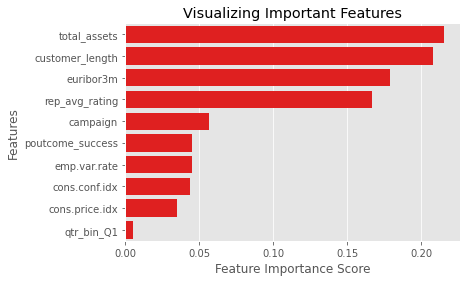


# **Conclusion**
---

## Can we predict whether a customer will open a term deposit account with the bank after a targeted marking campaign?


Yes, we can predict this with our modeling.


## Feature Importance

We found 10 important features, and then ranked them based on the Random Forest model. Of those, we find there are three distinct groups of these features in terms of how important they are to the model: high importance, moderate importance, low imprtance.

Of those, the high importance features are the main drivers of the model, which are, sorted in order: customer total assets, length a customer has been with the bank, Euribor 3 month floating average, and representative average rating prior the the current campaign. These high importance features are a mix of customer attribute, macroeconomic environment, and the specific agent from the bank designated for that customer interaction.

## Who does this benefit?

### Sales Teams

Campaigns like these are specifically designed to result in the highest amount of sign ups for the goal. In general, sales teams are the ones who are tasked with a marketing campaign like this, generally being the ones who are the point of contact for the representative. Since sales are typically linked to comissions or a flat rate per customer conversion, this model will let the sales team to be much more targeted in the approach to targeting customers for product sales.


### Bank Administration

Typically, strategy is set by bank leadership and will movbe down to various teams for execution. This bank was looking to gain depository assets and designed a marketing campaign to get customers to do that in the form of a term deposit account. Federal mandates like minimum reserve ratios, tested by programs like CCAR, are generally ways to predict if a bank is stable enough to withstand an economic downturn or catostrophic company event. While this bank is in Protugal, the European Central Bank has programs and initiatives similar to that as the Federal Reserve.


### Customers

The fact that customers subscribe to term deposit accounts means they were representing an underserved population with an unmet need. This campaign exposed the fact that some customers, when presented with the option, deemed it was in their best interest to subscribe to a term deposit account. Without this option, they would be worse off overall. And with the fact that these customers subscribed meant they were not seeking the product or something similar with this bank or any other.

# **Next Steps**

Given more time, we would continue to explore the models and continue with Random Search and Grid Search. We think with additional resources we could also have a greater impact with thoughtful feature engineering. Given the time constraints and the focus on creating a complete pipeline first, we left more robust feature engineering out of this model. 

Additionally, we would also test different pipelines with respect to skewness, outlier handling, min-maxing and standardizing the datset. We found that the order of these processes could substantially change the output and scoring of the various models.

Lastly, we would dedicate considerable time to hyperparameter tuning. We ran out of time given competing effort to do much in this area. While we understand what needs to be done, the iterations over our various models, bootstrapping, TPOT, and creating this report left us with less time than we had hoped for.

# **Lessons Learned**

Data processing contributed to about 75% of the effort in this analysis and much of it was creating, testing, and running various functions and methods to prepare the data for modeling. We have a greater appreciation in the effort it takes to process data and prepare for modeling. Additionally, with shared resources using cloud computer, some models can take an extremely long time to run. Having a notebook run locally will likely yield results quicker. Related to that, we would allocate more time to model execution, as we had ephasized more time dedicated to writing code for processing and modeling instead of allocating that time to model execution. Depending on the model and hyperparameter selected and their values, the amount of time to execute can vary in amounts we had not anticipated.

Lastly, we would plan out the project better for specific milestones throughout the pipeline(s). Having an outline and general understanding of what is required from data retrieval to model interpretation can allow for maximum optimization of the models and output. While we knew this is an iterative process, we had not know to the extent it can be.



# **Presentation**

[Presentation Deck](https://docs.google.com/presentation/d/18vLcaGwO4JmWeKgq_EPFt0cHgfj9etwi/edit?usp=sharing&ouid=100256322139465309567&rtpof=true&sd=true)
